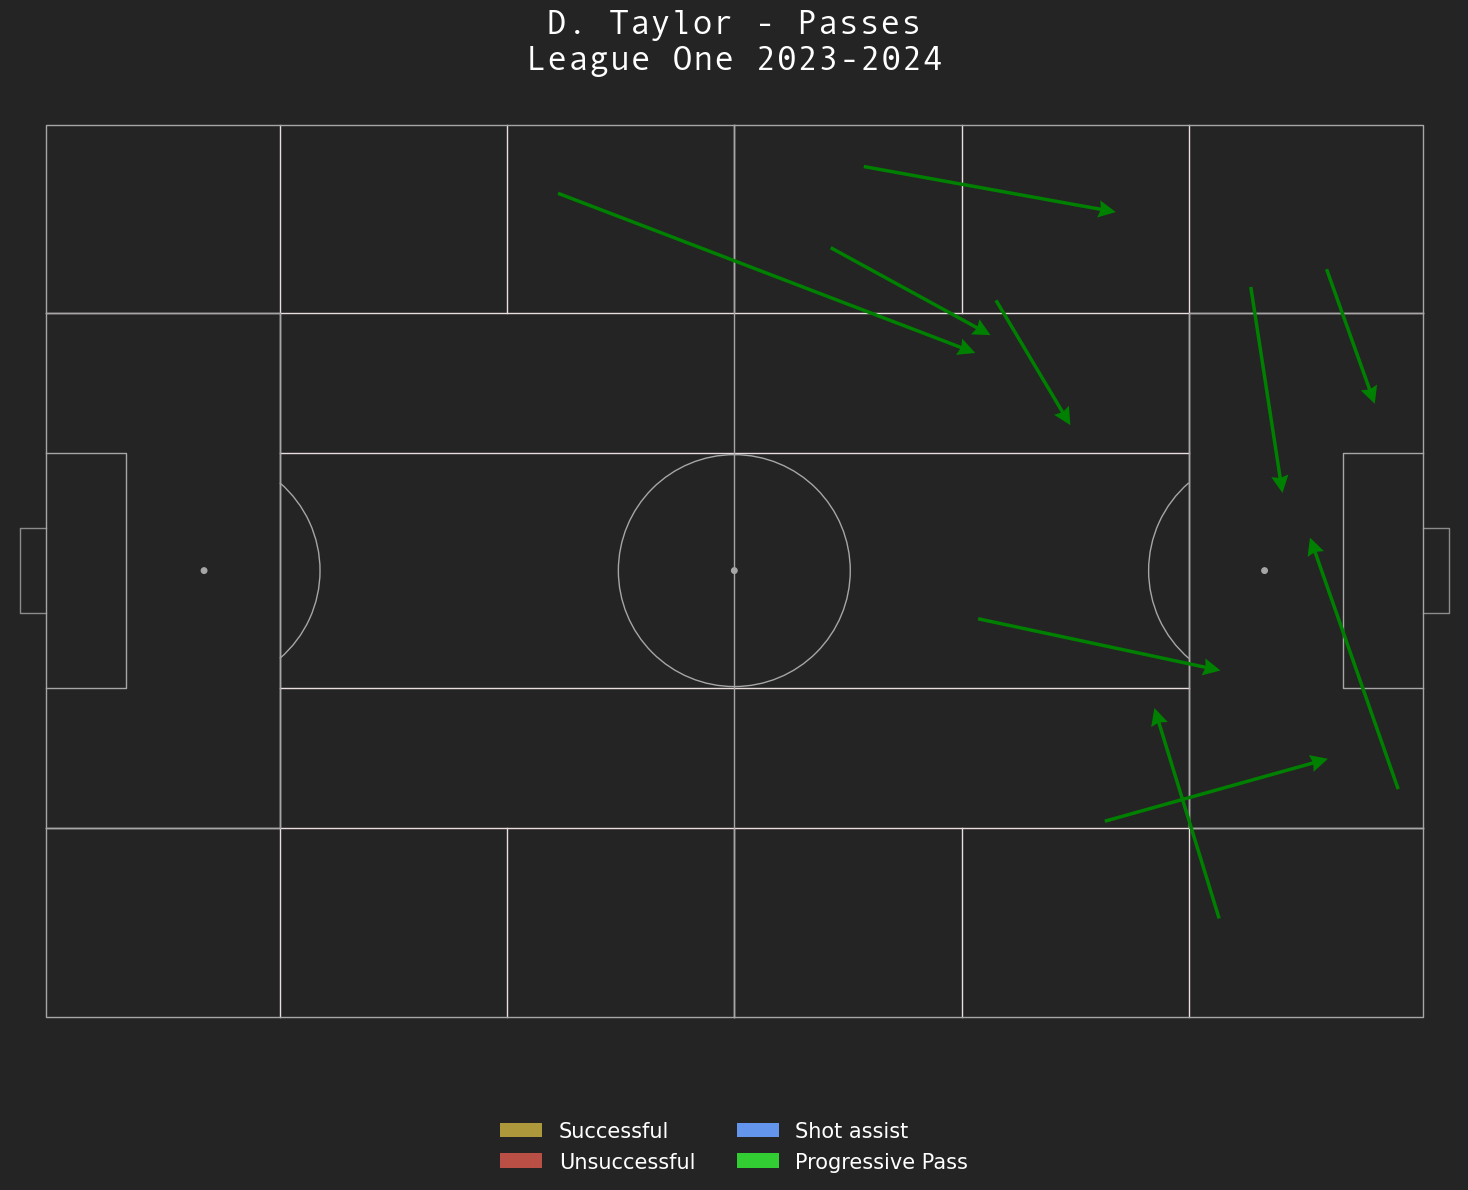

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
from matplotlib.path import Path
from matplotlib import patches
import matplotlib.patheffects as path_effects
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch, FontManager
import math
from matplotlib.colors import to_rgba
from scipy.spatial import ConvexHull
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = pd.read_excel("Czechia 3-0 Moldova Progressive passes.xlsx")
df = df.loc[(df['playerName']=='D. Taylor')].reset_index()

pitch = Pitch(positional=True, pitch_type='opta', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='#a6a6a6',
                      linewidth=1, half=False, goal_type='box', goal_alpha=0.8)

fig, ax = pitch.draw(figsize=(18, 12))


for i, x in enumerate(df['x']):
    if 'outcome' in df.columns and df['outcome'].iloc[i] == 1 and df['progressive'].iloc[i] == True: #and df['Corner'].iloc[i] != 1:
        end_x = pd.Series(df['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df['endY'].iloc[i]).astype(float)
        pitch.arrows(df['x'].iloc[i], df['y'].iloc[i], end_x, end_y, 
                     width=2.5, zorder=2, headwidth=5, headlength=5, color='green', ax=ax)

#for i, x in enumerate(df['x']):
 #   if 'outcome' in df.columns and df['outcome'].iloc[i] == 1 and df['Assist'].iloc[i] == 1: #and df['Corner'].iloc[i] != 1:
  #      end_x = pd.Series(df['endX'].iloc[i]).astype(float)
   #     end_y = pd.Series(df['endY'].iloc[i]).astype(float)
    #    pitch.arrows(df['x'].iloc[i], df['y'].iloc[i], end_x, end_y, 
     #                width=2.5, zorder=2, headwidth=5, headlength=5, color='cornflowerblue', ax=ax)

total_passes = len(df)
successful_passes = df[df['outcome'] == 1]['outcome'].count()
successful_percentage = (successful_passes / total_passes) * 100

fig.set_facecolor('#242424')

ax.set_title("D. Taylor - Passes\nLeague One 2023-2024", fontsize=25, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)

colors = {'Successful': '#ad993c', 'Unsuccessful': '#ba4f45', 'Shot assist': 'cornflowerblue', 'Progresssive Pass': "limegreen"}
labels = {'Successful': 'Successful', 'Unsuccessful': 'Unsuccessful', 'Shot assist': 'Shot assist', 'Progressive Pass': 'Progressive Pass'}

ax.legend(handles=[patches.Patch(facecolor=color) for color in colors.values()],
          labels=labels.values(), labelcolor='w', loc='lower center', bbox_to_anchor=(0.5, -0.18),
          ncol=2, frameon=False, fontsize=15)

plt.savefig('passes.png', dpi=750, bbox_inches='tight', facecolor='#242424')


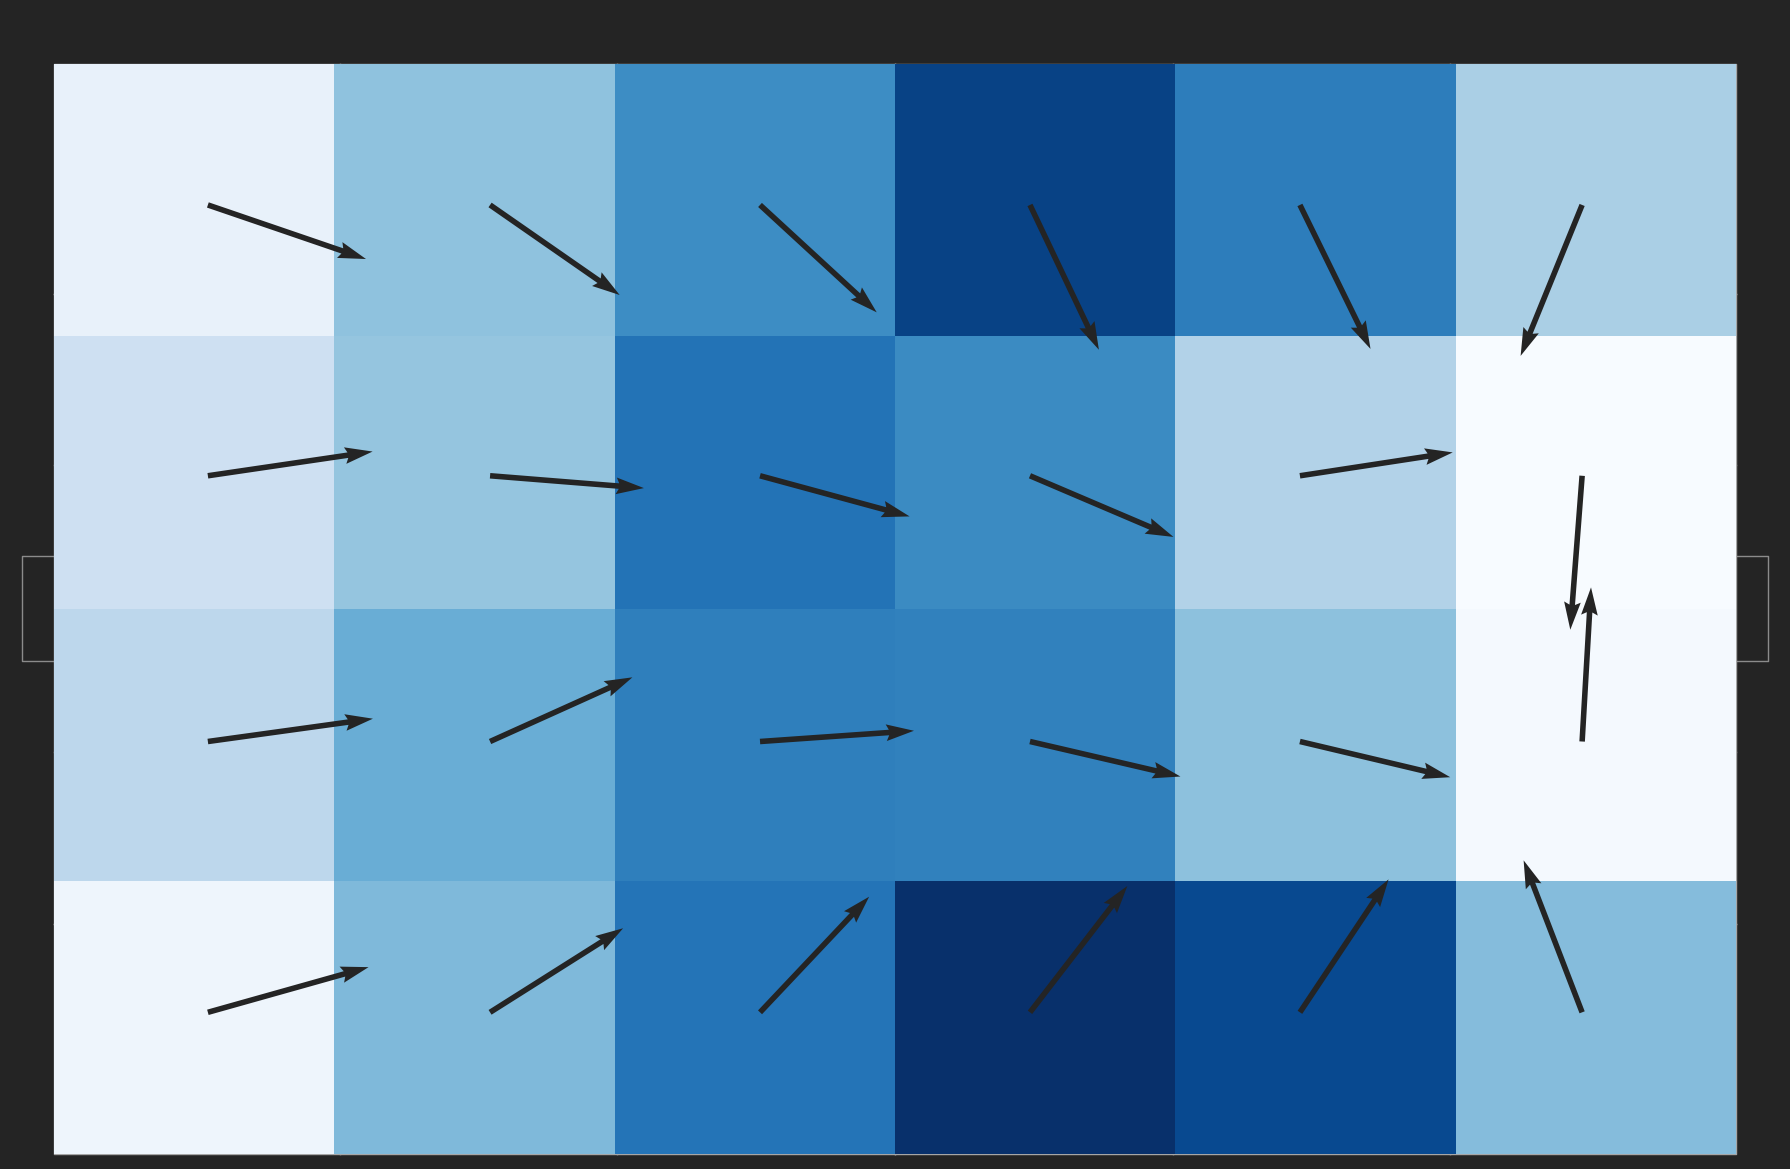

In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 12 20:31:16 2021

@author: lamberts_888
"""
from mplsoccer.pitch import VerticalPitch
from matplotlib import rcParams
from scipy.stats import circmean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

rcParams['text.color'] = '#c7d5cc'  # set the default text color

df = pd.read_excel('Czechia xT.xlsx')
df = df.loc[(df['contestantId']=='70tnqyqn871jwlk26gtjw7knm')].reset_index()

df['x'] = df['x']
df['y'] = df['y']
df['endX'] = df['endX']
df['endY'] = df['endY']

pitch = Pitch(positional=True, pitch_type='opta', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='#a6a6a6',
                      linewidth=1, half=False, goal_type='box', goal_alpha=0.8)

fig, ax = pitch.draw(figsize=(18, 12))
bins = (6, 4)


bs_heatmap = pitch.bin_statistic(df.x, df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')

mask = df.endX.notnull()
df = df[mask].copy()

 #  plot the pass flow map with a single color ('black') and length of the arrow (5)
fm =pitch.flow(df.x, df.y, df.endX, df.endY, color='#242424', arrow_type='same', arrow_length=10, bins=bins, ax=ax)

#grey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
#fm = pitch.flow(df.x, df.y, df.endX, df.endY, cmap=grey,
 #              arrow_type='average', arrow_length=10, bins=bins, ax=ax)

fig.set_facecolor('#242424')
